In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

def urltemplate(template):
    def opener(**kwargs):
        return urlopen(template.format_map(kwargs))
    return opener

def getUPC(apno):
	Usurltempale ="http://patft.uspto.gov/netacgi/nph-Parser?Sect2=PTO1&Sect2=HITOFF&p=1&u=%2Fnetahtml%2FPTO%2Fsearch-bool.html&r=1&f=G&l=50&d=PALL&RefSrch=yes&Query=PN%2F{patNo}"
	USpatent = urltemplate(Usurltempale)

	Pat_html = USpatent(patNo=apno)
	bsObj = BeautifulSoup(Pat_html.read(), "lxml")
	tables = bsObj.findChildren("table")

	############################################################
	#尋找包含"Current U.S. Class:"的表，有時在第4個有時在第5個
	############################################################

	p = tables[0].find(text=re.compile('Current U.S. Class:'))
	i = 2
	while p == None:
	    i += 1
	    p = tables[i].find(text=re.compile('Current U.S. Class:'))
	    #print(i,p)


	############################################################
	#取出包含"Current U.S. Class:"的表內的每一欄位的文字或字串。
	############################################################
	datas = []
	rows = tables[i].findChildren(['tr'])
	for row in rows:
	    cells = row.findChildren('td')
	    for cell in cells:
	        cell_content = cell.getText()
	        cleandata = re.sub( '\s+'    , ' ', cell_content).strip()
	        cleandata = re.sub( '\(.*?\)', '' , cleandata).strip()
	        cleandata = re.sub( '&nbsp'  , ' ', cleandata).strip()    
	        datas.append(cleandata)         
	return datas


In [5]:
patlist = ['5896186', '6530660', '6817710', '7070273', '7566127', '7886405', '8517532', '9541771']
mixeddata = list (map(getUPC, patlist))                 #取得所有專利的 UPC

mixeddata

[['Current U.S. Class:',
  '351/110; 16/228; 351/121; 351/146; 351/153; 351/47',
  'Current CPC Class:',
  'G02C 1/02 ; G02C 1/06 ; G02C 5/2209 ; G02C 5/2272 ; G02C 5/229 ; G02C 9/00 ; Y10T 16/526',
  'Current International Class:',
  'G02C 9/00 ; G02C 5/22 ; G02C 1/02 ; G02C 1/00 ; G02C 1/06 ; G02C 001/02 ; G02C 005/22',
  'Field of Search:',
  ';351/44,47,111,115,121,124,133,146,153,110 ;16/228'],
 ['Current U.S. Class:',
  '351/63; 16/228; 2/454; 351/153',
  'Current CPC Class:',
  'G02C 5/006 ; G02C 5/2263 ; Y10T 16/526 ; G02C 2200/02',
  'Current International Class:',
  'G02C 5/00 ; G02C 5/22 ; G02C 005/08 ; G02C 005/14',
  'Field of Search:',
  ';351/63,153,111,119,118,115,41 ;2/454 ;16/228'],
 ['Current U.S. Class:',
  '351/115; 351/113; 351/153; 351/63',
  'Current CPC Class:',
  'G02C 5/001 ; G02C 5/006 ; G02C 5/2263 ; G02C 5/14 ; G02C 5/229 ; G02C 2200/28 ; Y10T 16/526',
  'Current International Class:',
  'G02C 5/00 ; G02C 5/22 ; G02C 005/08',
  'Field of Search:',
  ';351/

In [10]:
upclist = [x[1] for x in mixeddata] #mixeddata[0][1]
cpclist = [x[3] for x in mixeddata] #mixeddata[0][1]
Ipclist = [x[5] for x in mixeddata] #mixeddata[0][1]


In [8]:
#UPC
g = upclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量

print(D)

Counter({'351/153': 5, '351/63': 5, '16/228': 3, '351/115': 3, '351/121': 2, '351/110': 1, '351/146': 1, '351/47': 1, '2/454': 1, '351/113': 1, '206/5': 1, '351/41': 1, '16/224': 1, '1/1': 1})


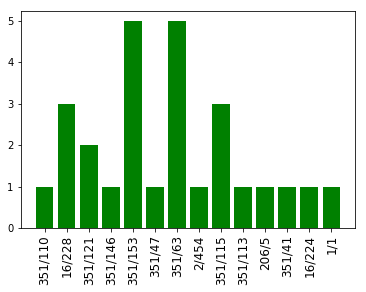

In [9]:
import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()


Counter({'G02C 5/006': 6, 'G02C 5/2263': 6, 'Y10T 16/526': 5, 'G02C 5/229': 4, 'G02C 2200/28': 3, 'G02C 5/2209': 2, 'G02C 5/001': 2, 'G02C 5/14': 2, 'G02C 1/02': 1, 'G02C 1/06': 1, 'G02C 5/2272': 1, 'G02C 9/00': 1, 'G02C 2200/02': 1, 'F16C 11/0604': 1, 'Y10T 16/524': 1, 'G02C 5/10': 1})


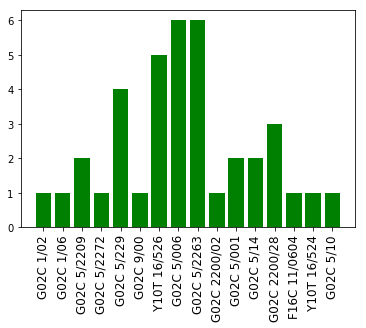

In [11]:
#UPC
g = cpclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()






Counter({'G02C 5/22': 5, 'G02C 5/00': 3, 'G02C 5/08': 3, 'G02C 005/08': 2, 'G02C 9/00': 1, 'G02C 1/02': 1, 'G02C 1/00': 1, 'G02C 1/06': 1, 'G02C 001/02': 1, 'G02C 005/22': 1, 'G02C 005/14': 1, 'E05D 7/00': 1, 'G02C 5/10': 1})


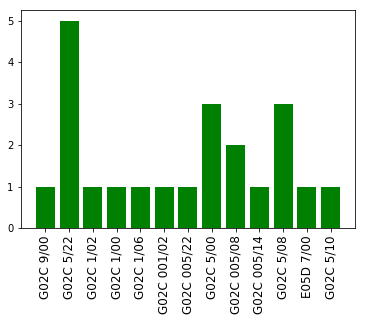

In [12]:
g = Ipclist              #要在這裡變更參數
ag = ";".join(g)
sg = list (map(str.strip, ag.split(';'))) 

from collections import Counter
D = Counter(sg)   #計算各類別的數量
print(D)

import matplotlib.pyplot as plt

plt.bar(   range(len(D)), D.values(), color='g', align='center')
plt.xticks(range(len(D)), D.keys()  , fontsize = 12, rotation='vertical')

plt.show()


In [2]:
#patlist = ['5896186', '6530660', '6817710', '7070273', '7566127', '7886405', '8517532', '9541771']
patlist = ['5896186']


mixeddata = list (map(getUPC, patlist)) #取得所有專利的 UPC

mixeddata

[['Current U.S. Class:',
  '351/110; 16/228; 351/121; 351/146; 351/153; 351/47',
  'Current CPC Class:',
  'G02C 1/02 ; G02C 1/06 ; G02C 5/2209 ; G02C 5/2272 ; G02C 5/229 ; G02C 9/00 ; Y10T 16/526',
  'Current International Class:',
  'G02C 9/00 ; G02C 5/22 ; G02C 1/02 ; G02C 1/00 ; G02C 1/06 ; G02C 001/02 ; G02C 005/22',
  'Field of Search:',
  ';351/44,47,111,115,121,124,133,146,153,110 ;16/228']]